<a href="https://colab.research.google.com/github/RudraRudra123/AIML/blob/master/seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [84]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import losses

In [85]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras.models import Model 
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [86]:
# #load dataset
# df = pd.read_csv('dataset.csv')

In [87]:
#data source from Google colab
from google.colab import drive
drive.mount('/content/drive')
main_path = '/content/drive/MyDrive/ML Datasets/LSTM-dataset'
df = pd.read_csv(main_path+'/seq2seq-dataset.csv', header=0, squeeze=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df

,DMDUNIT,DMDGROUP,LOC,STARTDATE,EVENT,HISTSTREAM,DMDCAL,TYPE,PERIOD1,PERIOD2,...,PERIOD95,PERIOD96,PERIOD97,PERIOD98,PERIOD99,PERIOD100,PERIOD101,PERIOD102,PERIOD103,PERIOD104
0,G1010,OMNI,G1010_L0,6/11/2016 0:00,,POS,DMDWEEK,1,236,254,...,92,128,117,204,182,313,241,259,199,179
1,G1246,OMNI,G1246_L0,6/11/2016 0:00,,POS,DMDWEEK,1,29,27,...,45,38,39,68,102,90,69,69,99,65
2,G16,OMNI,G16_L0,6/11/2016 0:00,,POS,DMDWEEK,1,0,0,...,4,2,3,3,3,0,2,4,2,2
3,G1896,OMNI,G1896_L0,6/11/2016 0:00,,POS,DMDWEEK,1,60,66,...,83,59,41,57,82,56,71,54,70,59
4,G1026,OMNI,G1026_L0,6/11/2016 0:00,,POS,DMDWEEK,1,0,1,...,1,0,0,4,0,0,0,1,0,1
5,G1400,OMNI,G1400_L0,6/11/2016 0:00,,POS,DMDWEEK,1,533,500,...,774,763,746,741,717,707,655,675,707,743
6,G1683,OMNI,G1683_L0,6/11/2016 0:00,,POS,DMDWEEK,1,"1,069","1,146",...,"1,442","1,358","1,316","1,396","1,370","1,149","1,207","1,436","1,316","1,266"
7,G1889,OMNI,G1889_L0,6/11/2016 0:00,,POS,DMDWEEK,1,273,196,...,224,234,216,260,290,210,247,267,223,205
8,G1660,OMNI,G1660_L0,6/11/2016 0:00,,POS,DMDWEEK,1,492,616,...,347,468,806,423,286,53,43,390,479,85
9,G1978,OMNI,G1978_L0,6/11/2016 0:00,,POS,DMDWEEK,1,744,771,...,758,675,739,704,642,576,670,604,610,548


In [89]:
df= df.drop(['DMDGROUP','LOC','EVENT','HISTSTREAM', 'DMDCAL', 'TYPE'], axis=1)
first_col = df.pop('STARTDATE')
df.insert(0,'STARTDATE', first_col)
df

,STARTDATE,DMDUNIT,PERIOD1,PERIOD2,PERIOD3,PERIOD4,PERIOD5,PERIOD6,PERIOD7,PERIOD8,...,PERIOD95,PERIOD96,PERIOD97,PERIOD98,PERIOD99,PERIOD100,PERIOD101,PERIOD102,PERIOD103,PERIOD104
0,6/11/2016 0:00,G1010,236,254,220,214,188,167,152,141,...,92,128,117,204,182,313,241,259,199,179
1,6/11/2016 0:00,G1246,29,27,37,20,34,13,28,13,...,45,38,39,68,102,90,69,69,99,65
2,6/11/2016 0:00,G16,0,0,0,6,2,0,0,0,...,4,2,3,3,3,0,2,4,2,2
3,6/11/2016 0:00,G1896,60,66,82,73,66,59,76,78,...,83,59,41,57,82,56,71,54,70,59
4,6/11/2016 0:00,G1026,0,1,0,0,0,0,0,0,...,1,0,0,4,0,0,0,1,0,1
5,6/11/2016 0:00,G1400,533,500,505,494,501,480,464,491,...,774,763,746,741,717,707,655,675,707,743
6,6/11/2016 0:00,G1683,"1,069","1,146","1,198","1,185","1,264","1,195","1,156","1,166",...,"1,442","1,358","1,316","1,396","1,370","1,149","1,207","1,436","1,316","1,266"
7,6/11/2016 0:00,G1889,273,196,263,249,260,255,257,255,...,224,234,216,260,290,210,247,267,223,205
8,6/11/2016 0:00,G1660,492,616,213,302,455,262,206,296,...,347,468,806,423,286,53,43,390,479,85
9,6/11/2016 0:00,G1978,744,771,801,831,776,844,932,852,...,758,675,739,704,642,576,670,604,610,548


In [90]:
# Print null values count in entire dataframe
df.isna().sum().sum()

0

In [91]:
count = 1
for i in df.columns:
    if count > 2:
        df[i] = df[i].astype(str)
        df[i] = df[i].str.replace(",","")
    count=count+1

In [92]:
# Print null values count in entire dataframe
df.isna().sum().sum()

0

In [93]:
df

,STARTDATE,DMDUNIT,PERIOD1,PERIOD2,PERIOD3,PERIOD4,PERIOD5,PERIOD6,PERIOD7,PERIOD8,...,PERIOD95,PERIOD96,PERIOD97,PERIOD98,PERIOD99,PERIOD100,PERIOD101,PERIOD102,PERIOD103,PERIOD104
0,6/11/2016 0:00,G1010,236,254,220,214,188,167,152,141,...,92,128,117,204,182,313,241,259,199,179
1,6/11/2016 0:00,G1246,29,27,37,20,34,13,28,13,...,45,38,39,68,102,90,69,69,99,65
2,6/11/2016 0:00,G16,0,0,0,6,2,0,0,0,...,4,2,3,3,3,0,2,4,2,2
3,6/11/2016 0:00,G1896,60,66,82,73,66,59,76,78,...,83,59,41,57,82,56,71,54,70,59
4,6/11/2016 0:00,G1026,0,1,0,0,0,0,0,0,...,1,0,0,4,0,0,0,1,0,1
5,6/11/2016 0:00,G1400,533,500,505,494,501,480,464,491,...,774,763,746,741,717,707,655,675,707,743
6,6/11/2016 0:00,G1683,1069,1146,1198,1185,1264,1195,1156,1166,...,1442,1358,1316,1396,1370,1149,1207,1436,1316,1266
7,6/11/2016 0:00,G1889,273,196,263,249,260,255,257,255,...,224,234,216,260,290,210,247,267,223,205
8,6/11/2016 0:00,G1660,492,616,213,302,455,262,206,296,...,347,468,806,423,286,53,43,390,479,85
9,6/11/2016 0:00,G1978,744,771,801,831,776,844,932,852,...,758,675,739,704,642,576,670,604,610,548


In [94]:
df.to_csv('beforeMelt.csv')

In [95]:
# self.data_frame.pivot_table(index=group_by_cols, columns='LocationName',values=[target_col]).reset_index()
df.columns[2:,]

Index(['PERIOD1', 'PERIOD2', 'PERIOD3', 'PERIOD4', 'PERIOD5', 'PERIOD6',
       'PERIOD7', 'PERIOD8', 'PERIOD9', 'PERIOD10',
       ...
       'PERIOD95', 'PERIOD96', 'PERIOD97', 'PERIOD98', 'PERIOD99', 'PERIOD100',
       'PERIOD101', 'PERIOD102', 'PERIOD103', 'PERIOD104'],
      dtype='object', length=104)

In [96]:
# df.pivot_table(index='STARTDATE', columns = 'DMDUNIT', values = df.columns[2:,])
# df.pivot_table(index='STARTDATE', columns = 'DMDUNIT', values = df.columns[2:,])

### Step 1: Converting columns to rows

In [97]:

df_melt=df.melt(id_vars = ['STARTDATE','DMDUNIT'], var_name='PERIODS', value_name='SALES')
df_melt

,STARTDATE,DMDUNIT,PERIODS,SALES
0,6/11/2016 0:00,G1010,PERIOD1,236
1,6/11/2016 0:00,G1246,PERIOD1,29
2,6/11/2016 0:00,G16,PERIOD1,0
3,6/11/2016 0:00,G1896,PERIOD1,60
4,6/11/2016 0:00,G1026,PERIOD1,0
...,...,...,...,...
1035,6/11/2016 0:00,G1400,PERIOD104,743
1036,6/11/2016 0:00,G1683,PERIOD104,1266
1037,6/11/2016 0:00,G1889,PERIOD104,205
1038,6/11/2016 0:00,G1660,PERIOD104,85


In [98]:
index =0
for i in df_melt['PERIODS']:
    count=i.split("PERIOD",1)[1]
    df_melt.PERIODS[index] = int(count)
    index = index + 1

In [99]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STARTDATE  1040 non-null   object
 1   DMDUNIT    1040 non-null   object
 2   PERIODS    1040 non-null   object
 3   SALES      1040 non-null   object
dtypes: object(4)
memory usage: 32.6+ KB


In [100]:
df_melt["SALES"] = df_melt["SALES"].astype('int32')
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STARTDATE  1040 non-null   object
 1   DMDUNIT    1040 non-null   object
 2   PERIODS    1040 non-null   object
 3   SALES      1040 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 28.6+ KB


In [101]:
# df_melt['SALES']= pd.to_numeric(df_melt['SALES']) 
# df_melt["SALES"] = df_melt["SALES"].str.replace(",","")

# df_melt['SALES'].unique
# df_melt["SALES"] = df_melt["SALES"].str.replace(",","").astype('int32')
# df_melt

In [102]:
print(df_melt['SALES'].isnull().sum())

0


In [103]:
df_melt.to_csv('AfterMelt.csv')

### Step 2: Converting rows to columns

In [104]:
df_pivot = pd.pivot_table(df_melt, index=['STARTDATE','PERIODS'], columns =['DMDUNIT'], values=['SALES'])
df_pivot

SALES                                                \
DMDUNIT                G1010 G1026 G1246 G1400 G16 G1660 G1683 G1889 G1896   
STARTDATE      PERIODS                                                       
6/11/2016 0:00 1         236     0    29   533   0   492  1069   273    60   
               2         254     1    27   500   0   616  1146   196    66   
               3         220     0    37   505   0   213  1198   263    82   
               4         214     0    20   494   6   302  1185   249    73   
               5         188     0    34   501   2   455  1264   260    66   
...                      ...   ...   ...   ...  ..   ...   ...   ...   ...   
               100       313     0    90   707   0    53  1149   210    56   
               101       241     0    69   655   2    43  1207   247    71   
               102       259     1    69   675   4   390  1436   267    54   
               103       199     0    99   707   2   479  1316   223    70   
               104       179     1    65   743   2    85  1266   205    59   

                              
DMDUNIT                G1978  
STARTDATE      PERIODS        
6/11/2016 0:00 1         744  
               2         771  
               3         801  
               4         831  
               5         776  
...                      ...  
               100       576  
               101       670  
               102       604  
               103       610  
               104       548  

[104 rows x 10 columns]

### Step 3: Drop level to get one level of columns

In [105]:
df_pivot.columns = df_pivot.columns.droplevel()
df_pivot

DMDUNIT                 G1010  G1026  G1246  G1400  G16  G1660  G1683  G1889  \
STARTDATE      PERIODS                                                         
6/11/2016 0:00 1          236      0     29    533    0    492   1069    273   
               2          254      1     27    500    0    616   1146    196   
               3          220      0     37    505    0    213   1198    263   
               4          214      0     20    494    6    302   1185    249   
               5          188      0     34    501    2    455   1264    260   
...                       ...    ...    ...    ...  ...    ...    ...    ...   
               100        313      0     90    707    0     53   1149    210   
               101        241      0     69    655    2     43   1207    247   
               102        259      1     69    675    4    390   1436    267   
               103        199      0     99    707    2    479   1316    223   
               104        179      1     65    743    2     85   1266    205   

DMDUNIT                 G1896  G1978  
STARTDATE      PERIODS                
6/11/2016 0:00 1           60    744  
               2           66    771  
               3           82    801  
               4           73    831  
               5           66    776  
...                       ...    ...  
               100         56    576  
               101         71    670  
               102         54    604  
               103         70    610  
               104         59    548  

[104 rows x 10 columns]

### Step 4: Rename axis to remove DMDUNIT which is our previous column name

In [106]:
modified_df=df_pivot.rename_axis(None,axis=1)
modified_df

G1010  G1026  G1246  G1400  G16  G1660  G1683  G1889  \
STARTDATE      PERIODS                                                         
6/11/2016 0:00 1          236      0     29    533    0    492   1069    273   
               2          254      1     27    500    0    616   1146    196   
               3          220      0     37    505    0    213   1198    263   
               4          214      0     20    494    6    302   1185    249   
               5          188      0     34    501    2    455   1264    260   
...                       ...    ...    ...    ...  ...    ...    ...    ...   
               100        313      0     90    707    0     53   1149    210   
               101        241      0     69    655    2     43   1207    247   
               102        259      1     69    675    4    390   1436    267   
               103        199      0     99    707    2    479   1316    223   
               104        179      1     65    743    2     85   1266    205   

                        G1896  G1978  
STARTDATE      PERIODS                
6/11/2016 0:00 1           60    744  
               2           66    771  
               3           82    801  
               4           73    831  
               5           66    776  
...                       ...    ...  
               100         56    576  
               101         71    670  
               102         54    604  
               103         70    610  
               104         59    548  

[104 rows x 10 columns]

### Step 5: Reset index to convert our indices to columns

In [107]:
modified_df=modified_df.reset_index()
modified_df

,STARTDATE,PERIODS,G1010,G1026,G1246,G1400,G16,G1660,G1683,G1889,G1896,G1978
0,6/11/2016 0:00,1,236,0,29,533,0,492,1069,273,60,744
1,6/11/2016 0:00,2,254,1,27,500,0,616,1146,196,66,771
2,6/11/2016 0:00,3,220,0,37,505,0,213,1198,263,82,801
3,6/11/2016 0:00,4,214,0,20,494,6,302,1185,249,73,831
4,6/11/2016 0:00,5,188,0,34,501,2,455,1264,260,66,776
...,...,...,...,...,...,...,...,...,...,...,...,...
99,6/11/2016 0:00,100,313,0,90,707,0,53,1149,210,56,576
100,6/11/2016 0:00,101,241,0,69,655,2,43,1207,247,71,670
101,6/11/2016 0:00,102,259,1,69,675,4,390,1436,267,54,604
102,6/11/2016 0:00,103,199,0,99,707,2,479,1316,223,70,610


In [108]:
modified_df.to_csv('AfterPivot.csv')

### Plot time series graphs

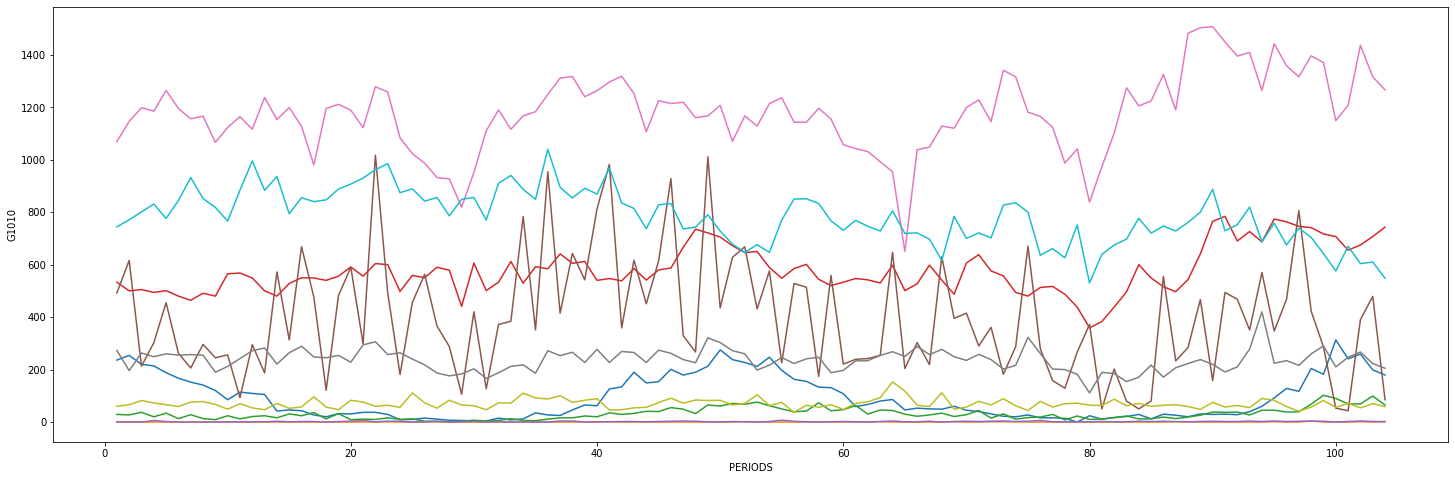

In [109]:
plt.figure(figsize=(25,8))
sns.lineplot(data=modified_df, x='PERIODS', y ='G1010')
sns.lineplot(data=modified_df, x='PERIODS', y ='G1026',ci=None)
sns.lineplot(data=modified_df, x='PERIODS', y ='G1246',ci=None)
sns.lineplot(data=modified_df, x='PERIODS', y ='G1400',ci=None)
sns.lineplot(data=modified_df, x='PERIODS', y ='G16',ci=None)
sns.lineplot(data=modified_df, x='PERIODS', y ='G1660',ci=None)
sns.lineplot(data=modified_df, x='PERIODS', y ='G1683',ci=None)
sns.lineplot(data=modified_df, x='PERIODS', y ='G1889',ci=None)
sns.lineplot(data=modified_df, x='PERIODS', y ='G1896',ci=None)
sns.lineplot(data=modified_df, x='PERIODS', y ='G1978',ci=None)

#### remove startDate as it reprents same date

In [110]:
dataset = modified_df.drop(['STARTDATE'], axis=1)
dataset

,PERIODS,G1010,G1026,G1246,G1400,G16,G1660,G1683,G1889,G1896,G1978
0,1,236,0,29,533,0,492,1069,273,60,744
1,2,254,1,27,500,0,616,1146,196,66,771
2,3,220,0,37,505,0,213,1198,263,82,801
3,4,214,0,20,494,6,302,1185,249,73,831
4,5,188,0,34,501,2,455,1264,260,66,776
...,...,...,...,...,...,...,...,...,...,...,...
99,100,313,0,90,707,0,53,1149,210,56,576
100,101,241,0,69,655,2,43,1207,247,71,670
101,102,259,1,69,675,4,390,1436,267,54,604
102,103,199,0,99,707,2,479,1316,223,70,610


### Split Dataset into Train Test 

In [111]:
df_train = dataset.loc[:75,:]
df_test = dataset.loc[75:,:]
print(df_train.shape, df_test.shape )

(76, 11) (29, 11)


In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train.drop(['PERIODS'], axis=1))
scaled_test = scaler.fit_transform(df_test.drop(['PERIODS'], axis=1))
print(scaled_train.shape, scaled_test.shape )

(76, 10) (29, 10)


In [55]:
def split_sequence(sequence, look_back, forecast_horizon):
 X, y = list(), list()
 for i in range(len(sequence)): 
   lag_end = i + look_back
   forecast_end = lag_end + forecast_horizon
   if forecast_end > len(sequence):
     break
   seq_x, seq_y = sequence[i:lag_end], sequence[lag_end:forecast_end]
   X.append(seq_x)
   y.append(seq_y)
 return np.array(X), np.array(y)

In [56]:
items_list = [i for i in dataset.columns if i != 'PERIODS']
items_list

['G1010',
 'G1026',
 'G1246',
 'G1400',
 'G16',
 'G1660',
 'G1683',
 'G1889',
 'G1896',
 'G1978']

In [57]:
# Take into consideration last 8 weeks, and perform forecasting for next 4 weeks
LOOK_BACK = 24
FORECAST_RANGE = 4
n_features = len(items_list)
X_train, y_train = split_sequence(scaled_train, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
X_test, y_test = split_sequence(scaled_test, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(49, 24, 10)
(49, 4, 10)
(2, 24, 10)
(2, 4, 10)


###Data Transformation

In [58]:
checkpoint_filepath = '/content/drive/MyDrive/ML Datasets/LSTM-dataset'
checkpoint_callback = ModelCheckpoint(
 filepath=checkpoint_filepath,
 save_weights_only=False,
 monitor='mse',
 mode='min',
 save_best_only=True)
early_stopping_callback = EarlyStopping(
 monitor='mse',
 min_delta=0.005,
 patience=10,
 mode='min'
)

In [59]:
rlrop_callback = ReduceLROnPlateau(monitor='mse', factor=0.2, mode='min', patience=3, min_lr=0.001)

In [60]:
def inverse_transform(y_test, yhat):
 y_test_reshaped = y_test.reshape(-1, y_test.shape[-1])
 yhat_reshaped = yhat.reshape(-1, yhat.shape[-1]) 
 yhat_inverse = scaler.inverse_transform(yhat_reshaped)
 y_test_inverse = scaler.inverse_transform(y_test_reshaped)
 return yhat_inverse, y_test_inverse

In [72]:
def evaluate_forecast(y_test_inverse, yhat_inverse):
 mse_ = losses.MeanSquaredError()
 mae_ = losses.MeanAbsoluteError()
 mape_ = losses.MeanAbsolutePercentageError() 
 mae = mae_(y_test_inverse,yhat_inverse)
 print('mae:', mae)
 mse = mse_(y_test_inverse,yhat_inverse)
 print('mse:', mse)
 mape = mape_(y_test_inverse,yhat_inverse)
 print('mape:', mape)

In [70]:
epochs = 50
batch_size = 5
validation = 0.1

In [75]:
model_enc_dec = Sequential()
model_enc_dec.add(LSTM(100, activation='relu', input_shape=(LOOK_BACK, n_features)))
model_enc_dec.add(RepeatVector(FORECAST_RANGE))
model_enc_dec.add(LSTM(100, activation='relu', return_sequences=True))
model_enc_dec.add(TimeDistributed(Dense(n_features)))
model_enc_dec.compile(optimizer='adam', loss='mse')
plot_model(model=model_enc_dec, show_shapes=True)
history = model_enc_dec.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])
yhat = model_enc_dec.predict(X_test, verbose=0)
yhat_inverse, y_test_inverse = inverse_transform(y_test, yhat)
evaluate_forecast(y_test_inverse, yhat_inverse)

Epoch 1/50
2/2 [==============================] - 5s 1s/step - loss: 0.2279 - val_loss: 0.2241 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 0s 82ms/step - loss: 0.2126 - val_loss: 0.2101 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 0s 86ms/step - loss: 0.1955 - val_loss: 0.1924 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 0s 86ms/step - loss: 0.1749 - val_loss: 0.1678 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 0s 82ms/step - loss: 0.1452 - val_loss: 0.1332 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 0s 109ms/step - loss: 0.1093 - val_loss: 0.1311 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 0s 108ms/step - loss: 0.1403 - val_loss: 0.1127 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 0s 112ms/step - loss: 0.0956 - val_loss: 0.1211 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 0s 95ms/step - loss: 0.0931 - val_loss: 0.1289 - lr: 0.0010
Epoch 10/

In [76]:
model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=9, activation='relu', input_shape=(LOOK_BACK, n_features)))
model_enc_dec_cnn.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model_enc_dec_cnn.add(MaxPooling1D(pool_size=2))
model_enc_dec_cnn.add(Flatten())
model_enc_dec_cnn.add(RepeatVector(FORECAST_RANGE))
model_enc_dec_cnn.add(LSTM(200, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(TimeDistributed(Dense(100, activation='relu')))
model_enc_dec_cnn.add(TimeDistributed(Dense(n_features)))
model_enc_dec_cnn.compile(loss='mse', optimizer='adam')
 
history = model_enc_dec_cnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation,callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback])
yhat_cnn = model_enc_dec_cnn.predict(X_test, verbose=0)
yhat_inverse_cnn, y_test_inverse_cnn = inverse_transform(y_test, yhat_cnn)
evaluate_forecast(y_test_inverse_cnn, yhat_inverse_cnn)

Epoch 1/50
2/2 [==============================] - 2s 350ms/step - loss: 0.2291 - val_loss: 0.1794 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 0s 66ms/step - loss: 0.1659 - val_loss: 0.1018 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 0s 52ms/step - loss: 0.1068 - val_loss: 0.1146 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0968 - val_loss: 0.1105 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 0s 59ms/step - loss: 0.0795 - val_loss: 0.1206 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0794 - val_loss: 0.1197 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 0s 50ms/step - loss: 0.0736 - val_loss: 0.1120 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0704 - val_loss: 0.1016 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0659 - val_loss: 0.0965 - lr: 0.0010
Epoch 10/

In [118]:
# yhat_inverse_cnn 
y_test_inverse_cnn_df = pd.DataFrame(y_test_inverse_cnn)
y_test_inverse_cnn_df.to_csv('y_test.csv')
yhat_inverse_cnn_df = pd.DataFrame(yhat_inverse_cnn)
yhat_inverse_cnn_df = pd.DataFrame(yhat_inverse_cnn)
yhat_inverse_cnn_df.to_csv('y_pred_cnn.csv')